In [1]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background") # I am using dark mode notebook, so I use this to see the chart.
#to use dark mode:
# edited '/usr/local/lib/python3.7/dist-packages/qiskit/visualization/bloch.py line 177 self.font_color = 'white'
# edited '/usr/local/lib/python3.7/dist-packages/qiskit/visualization/counts_visualization.py line 206     ax.set_facecolor('#000000')
%matplotlib inline


statevec_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend('qasm_simulator')

def do_job(circuit):
    job = q.execute(circuit, backend=statevec_simulator)
    result = job.result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.num_qubits
    circuit.measure([i for i in range(n_qubits)], [i for i in range(n_qubits)])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

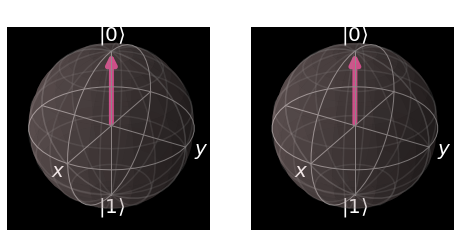

In [30]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

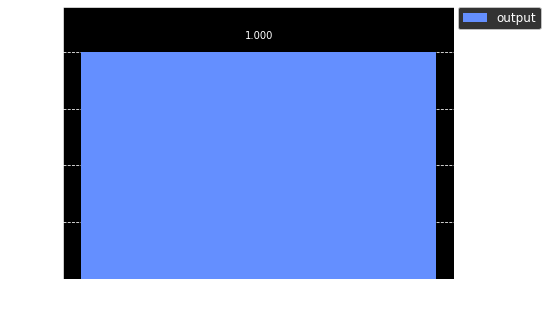

In [31]:
plot_histogram([counts], legend = ["output"])

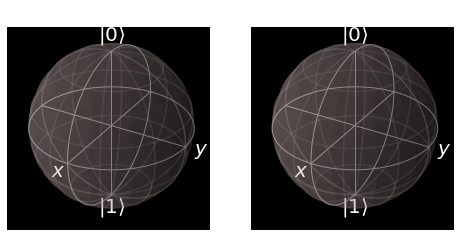

In [32]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits
circuit.h(0)
circuit.cx(0,1)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

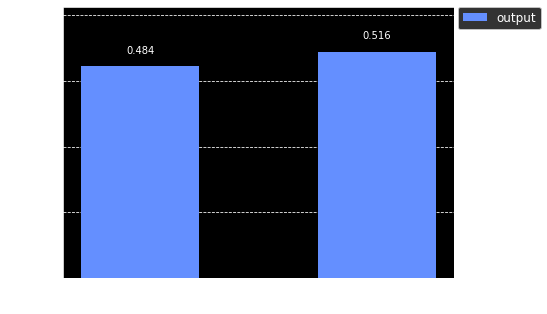

In [33]:
plot_histogram([counts], legend = ["output"])

In [36]:
circuit = q.QuantumCircuit(3,3)  # 2 qubits, 2 classical bits
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤  │  
q_1: ┤ H ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘
c: 3/══════════

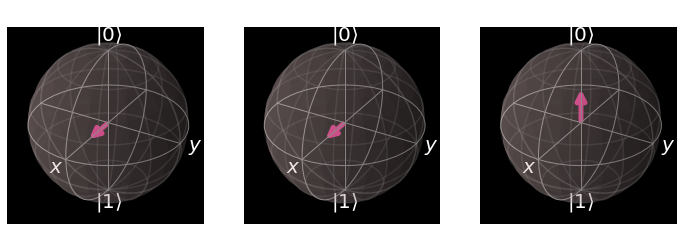

In [37]:
 statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

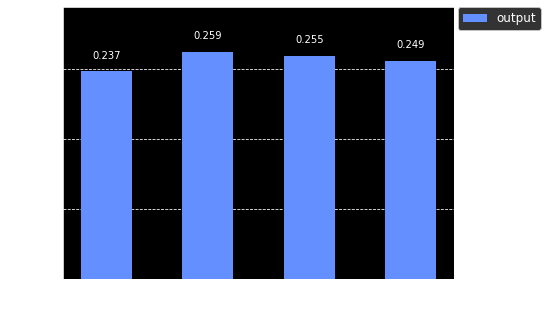

In [38]:
plot_histogram([counts], legend = ["output"])

In [46]:
circuit = q.QuantumCircuit(3,3)  # 2 qubits, 2 classical bits
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
circuit.measure([2],[0])
circuit.draw()


┌───┐        
q_0: ┤ H ├──■─────
     ├───┤  │     
q_1: ┤ H ├──■─────
     └───┘┌─┴─┐┌─┐
q_2: ─────┤ X ├┤M├
          └───┘└╥┘
c: 3/═══════════╩═
                0

In [47]:
qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()

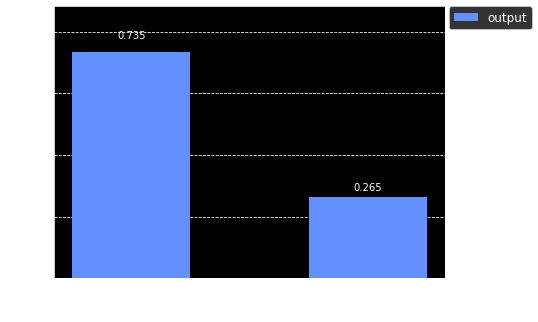

In [48]:
plot_histogram([counts], legend = ["output"])

In [60]:
import math
circuit = q.QuantumCircuit(3,3)  # 2 qubits, 2 classical bits
circuit.h(0)
circuit.h(1)
circuit.rx(math.pi/4, 2)
#circuit.ccx(0,1,2)
circuit.draw()

┌───┐   
q_0: ───┤ H ├───
        ├───┤   
q_1: ───┤ H ├───
     ┌──┴───┴──┐
q_2: ┤ RX(π/4) ├
     └─────────┘
c: 3/═══════════

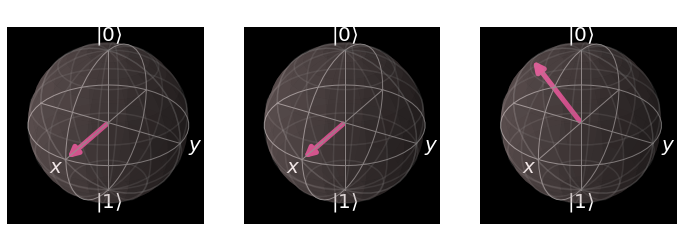

In [61]:
 statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

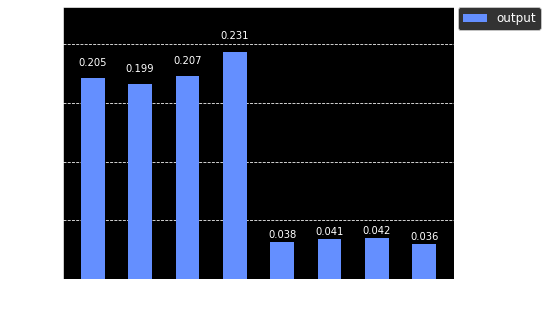

In [62]:
plot_histogram([counts], legend = ["output"])

In [64]:
circuit = q.QuantumCircuit(3,3)  # 2 qubits, 2 classical bits
circuit.h(0)
circuit.h(1)
circuit.rx(math.pi/4, 2)
circuit.measure([2], [0])
circuit.draw()

┌───┐      
q_0: ───┤ H ├──────
        ├───┤      
q_1: ───┤ H ├──────
     ┌──┴───┴──┐┌─┐
q_2: ┤ RX(π/4) ├┤M├
     └─────────┘└╥┘
c: 3/════════════╩═
                 0

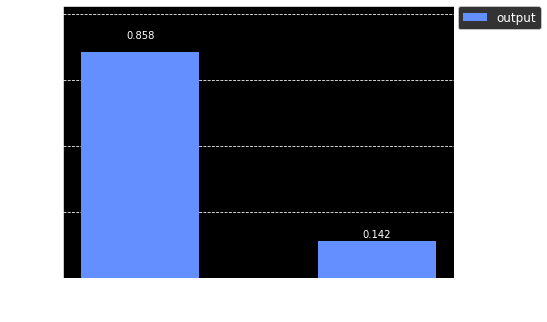

In [66]:
qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts],legend=['output'])